In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!pip install catboost
!pip install pycaret
from tqdm.notebook import tqdm
from pycaret.regression import *

import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# https://dacon.io/competitions/official/235745/data

In [ ]:
#데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
age_gender = pd.read_csv('age_gender_info.csv')

In [ ]:
# 임대보증금과 임대료는 '-'을 null로 바꾼 후 float로 타입 변경
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

지역, 세대수, 전용면적, 전용면적별세대수 정보를 바탕으로 실제 임대 모집 공고와 비교를 통해 임대보증금, 임대료 결측치 대체

In [ ]:
#강원도 | 행복주택
# 전용면적 16.91 
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 16.91), '임대보증금'] = 13450000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 16.91), '임대료'] = 65500
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 19700000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 96000
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 19150000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 94000
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 21400000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 105000


#부산광역시 | 국민임대
# 전용면적 24.72
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.72), '임대보증금'] = 7000000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.72), '임대료'] = 135000
# 전용면적 24.79
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.79), '임대보증금'] = 7000000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.79), '임대료'] = 135000
# 전용면적 26.83
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 26.83), '임대보증금'] = 7600000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 26.83), '임대료'] = 142000
# 전용면적 37.7
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 37.7), '임대보증금'] = 14800000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 37.7), '임대료'] = 198000
# 전용면적 46.94
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 46.94), '임대보증금'] = 23100000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 46.94), '임대료'] = 259000

#대구광역시 | 국민임대
# 전용면적 29.17
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대료'] = 138600
# 전용면적 29.34
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대료'] = 138600
# 전용면적 37.43
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대보증금'] = 17338000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대료'] = 197500

#강원도 | 영구임대
# 전용면적 24.83
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대보증금'] = 2129000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대료'] = 42350
# 전용면적 33.84
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대보증금'] = 2902000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대료'] = 57730

#경상남도 | 행복주택
# 전용면적 16.94
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대보증금'] = 11200000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대료'] = 53200
# 전용면적 26.85
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 16333330
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 77580
# 전용면적 26.85
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 18620000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 88440
# 전용면적 36.77
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대보증금'] = 23760000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대료'] = 112860

#대전광역시 | 임대상가
# 전용면적 26.37
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대보증금'] = 5787000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대료'] = 79980
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '자격유형'] = 'C'
# 전용면적 52.74
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대보증금'] = 11574000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대료'] = 159960
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '자격유형'] = 'C'

In [ ]:
#임대료, 임대 보증금 0으로 대치
train.loc[train['공급유형']== '공공분양','임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형']== '장기전세','임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형']== '국민임대','임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형']== '행복주택','임대료'] = train['임대료'].fillna(0)

train.loc[train['공급유형']== '공공분양','임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형']== '장기전세','임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형']== '국민임대','임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형']== '행복주택','임대보증금'] = train['임대보증금'].fillna(0)

In [ ]:
#임대 상가의 경우 지역별 평균값으로 대치
train.loc[train['지역'] == '부산광역시','임대료'] = train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[train['지역'] == '대전광역시','임대료'] = train['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
train.loc[train['지역'] == '경상남도','임대료'] = train['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
train.loc[train['지역'] == '충청남도','임대료'] = train['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
train.loc[train['지역'] == '강원도','임대료'] = train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[train['지역'] == '제주특별자치도','임대료'] = train['임대료'].fillna(train[train['지역'] == '제주특별자치도']['임대료'].mean())

#
train.loc[train['지역'] == '부산광역시','임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[train['지역'] == '대전광역시','임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
train.loc[train['지역'] == '경상남도','임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
train.loc[train['지역'] == '충청남도','임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
train.loc[train['지역'] == '강원도','임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[train['지역'] == '제주특별자치도','임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '제주특별자치도']['임대보증금'].mean())

In [ ]:
# test데이터 임대료, 임대보증금 결측값 처리
test.loc[test['공급유형'] == '영구임대','임대료'] = test['임대료'].fillna(0)
test.loc[test['공급유형'] == '행복주택','임대료'] = test['임대료'].fillna(0)

test.loc[test['공급유형'] == '영구임대','임대보증금'] = test['임대보증금'].fillna(0)
test.loc[test['공급유형'] == '행복주택','임대보증금'] = test['임대보증금'].fillna(0)

In [ ]:
#임대상가의 임대료, 임대보증금 처리
test.loc[test['지역'] == '부산광역시','임대료'] = test['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
test.loc[test['지역'] == '대전광역시','임대료'] = test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
test.loc[test['지역'] == '울산광역시','임대료'] = test['임대료'].fillna(train[train['지역'] == '울산광역시']['임대료'].mean())
test.loc[test['지역'] == '충청남도','임대료'] = test['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
test.loc[test['지역'] == '강원도','임대료'] = test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())

test.loc[test['지역'] == '부산광역시','임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '대전광역시','임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
test.loc[test['지역'] == '울산광역시','임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '울산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '충청남도','임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
test.loc[test['지역'] == '강원도','임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())

In [ ]:
#오류 데이터 삭제
#데이콘에서 공지한 데이터 오류
##1번 데이터 오류 (가장 큰 차이를 보이는 단지 4개에 대해 삭제) 
train = train[train.단지코드 != 'C1804']
train = train[train.단지코드 != 'C2405']
train = train[train.단지코드 != 'C1740']
train = train[train.단지코드 != 'C1206']

##2번 데이터오류 
train = train[train.단지코드 != 'C2085']
train = train[train.단지코드 != 'C1397']
train = train[train.단지코드 != 'C2431']
train = train[train.단지코드 != 'C1649']
train = train[train.단지코드 != 'C1036']

##3번 데이터 오류 
train = train[train.단지코드 != 'C1095']
train = train[train.단지코드 != 'C2051']
train = train[train.단지코드 != 'C1218']
train = train[train.단지코드 != 'C1894']
train = train[train.단지코드 != 'C2483']
train = train[train.단지코드 != 'C1502']
train = train[train.단지코드 != 'C1988']

In [ ]:
#지하철역수, 버스정류장수 결측치 처리
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(0)

In [ ]:
#버스정류장수가 50인 데이터는 이상값으로 판단하고 평균으로 대체
test.loc[test['도보 10분거리 내 버스정류장 수'] == 50, '도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].mean()

In [ ]:
#자격유형이 결측값인 데이터는 동일한 단지코드의 자격유형으로 대체
#196데이터
test.loc[(test.단지코드.isin(['C2411']))&(test.자격유형.isna()),'자격유형'] = 'A'
#258데이터
test.loc[(test.단지코드.isin(['C2253']))&(test.자격유형.isna()),'자격유형'] = 'C'

In [ ]:
# 공급유형 별로 임대유형, 임대기간, 입주조건 등이 상이함 → 차량 보유 여부를 비롯한 사회경제적지위(SES)를 반영할 것으로 예상
# 공급유형 별 특성과 '등록차량수-단지내주차면수' 차이 분포를 고려하여 범주 분류
# 국민임대(가장 많은 공급유형)와 임대상가(아파트와 명확한 임대유형 차이)는 별도의 범주로 분류
train.loc[train['공급유형'].isin(['공공임대(50년)']),'공급유형'] = '장기공공임대'
train.loc[train['공급유형'].isin(['공공임대(5년)', '공공임대(10년)', '공공임대(분납)', '공공분양']),'공급유형'] = '단기공공임대'
train.loc[train['공급유형'].isin(['행복주택', '영구임대', '장기전세']), '공급유형'] = '저소득층'

test.loc[test['공급유형'].isin(['공공임대(50년)']),'공급유형'] = '장기공공임대'
test.loc[test['공급유형'].isin(['공공임대(5년)', '공공임대(10년)', '공공임대(분납)', '공공분양']),'공급유형'] = '단기공공임대'
test.loc[test['공급유형'].isin(['행복주택', '영구임대', '장기전세']), '공급유형'] = '저소득층'

In [ ]:
#전용면적을 평수로 치환
train['전용면적'] = round(train['전용면적']/3.3)
test['전용면적'] = round(test['전용면적']/3.3)

In [ ]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [ ]:
#차량보유와 관련있는 age_gender데이터 
minors = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)']
age_gender['미성년자'] = age_gender[minors].sum(axis=1)
seniors = ['70대(여자)','70대(남자)','80대(여자)','80대(남자)','90대(여자)','90대(남자)','100대(여자)','100대(남자)']
age_gender['어르신'] = age_gender[seniors].sum(axis = 1)

In [ ]:
age_gender = age_gender[['지역','미성년자','어르신']]

In [ ]:
train = train.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')
test = test.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')

단지코드별로 groupby

In [ ]:
unique_cols = ['총세대수', '공가수', '미성년자', 
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수','어르신']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

In [ ]:
tr = train.groupby(['단지코드']).mean()
ts = test.groupby(['단지코드']).mean()

train_agg['전용면적별세대수 평균'] = tr['전용면적별세대수']
test_agg['전용면적별세대수 평균'] = ts['전용면적별세대수']

train_agg['임대보증금 평균'] = tr['임대보증금']
test_agg['임대보증금 평균'] = ts['임대보증금']

train_agg['임대료 평균'] = tr['임대료']
test_agg['임대료 평균'] = ts['임대료']

train_agg['전용면적 평균'] = tr['전용면적']
test_agg['전용면적 평균'] = ts['전용면적']

In [ ]:
tr = train.groupby(['단지코드']).nunique(dropna=False)
ts = test.groupby(['단지코드']).nunique(dropna=False)

train_agg['임대건물구분'] = tr['임대건물구분']
test_agg['임대건물구분'] = ts['임대건물구분']

In [ ]:
train_agg['실거주율'] = (train_agg['총세대수'] - train_agg['공가수'])/train_agg['총세대수']
test_agg['실거주율'] = (test_agg['총세대수'] - test_agg['공가수'])/test_agg['총세대수']

transport = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
train_agg['대중교통현황'] = train_agg[transport].sum(axis=1)
test_agg['대중교통현황'] = test_agg[transport].sum(axis=1)

In [ ]:
train_data = train_agg
test_data = test_agg

In [ ]:
print(train_data.shape)
print(test_data.shape)

(407, 15)
(150, 14)


In [ ]:
train_data['주차면수/총세대'] = train_data['단지내주차면수'] / train_data['총세대수']
test_data['주차면수/총세대'] = test_data['단지내주차면수'] / test_data['총세대수']

## log취하기
train_data['총세대수log'] = np.log1p(train_data['총세대수'])
test_data['총세대수log'] = np.log1p(test_data['총세대수'])

train_data['단지내주차면수log'] = np.log1p(train_data['단지내주차면수'])
test_data['단지내주차면수log'] = np.log1p(test_data['단지내주차면수'])

train_data['단지내주차면수/100'] = train_data['단지내주차면수']/100
test_data['단지내주차면수/100'] = test_data['단지내주차면수']/100

train_data['버스지하철log'] = np.log1p(train_data['대중교통현황'])
test_data['버스지하철log'] = np.log1p(test_data['대중교통현황'])

train_data['전용면적별세대수 평균 log'] = np.log1p(train_data['전용면적별세대수 평균'])
test_data['전용면적별세대수 평균 log'] = np.log1p(test_data['전용면적별세대수 평균'])

train_data['임대보증금 평균 log'] = np.log1p(train_data['임대보증금 평균'])
test_data['임대보증금 평균 log'] = np.log1p(test_data['임대보증금 평균'])

train_data['임대료 평균 log'] = np.log1p(train_data['임대료 평균'])
test_data['임대료 평균 log'] = np.log1p(test_data['임대료 평균'])

##target 값 비율로 바꾸고 필요 없는 특성 제거 (이를 target encoding 으로 칭하는 듯 함..?)
train_data['주차면수대비등록확률'] = train_data['등록차량수'] / train_data['단지내주차면수']
train_data = train_data.drop(columns=['단지내주차면수'])
test_data = test_data.drop(columns=['단지내주차면수'])
train_data = train_data.drop(columns=['등록차량수'])

pycaret모델링

In [ ]:
reg = setup(data=train_data,
            target='주차면수대비등록확률',
            session_id = 201,
            numeric_imputation = 'mean',
            fold_shuffle = True,
            numeric_features=list(train_data.drop(columns = ['주차면수대비등록확률']).columns),
            ignore_low_variance = True,
            combine_rare_levels = True, rare_level_threshold = 0.05,
            remove_multicollinearity = True, multicollinearity_threshold = 0.90,
            normalize = True,
            silent= True)

,Description,Value
0,session_id,201
1,Target,주차면수대비등록확률
2,Original Data,"(407, 22)"
3,Missing Values,False
4,Numeric Features,21
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(284, 15)"


In [ ]:
best_5_l = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.1935,0.0791,0.2733,0.1975,0.1424,0.2787,0.025
lr,Linear Regression,0.2010,0.0822,0.2792,0.1658,0.1448,0.2840,0.470
ridge,Ridge Regression,0.2012,0.0820,0.2788,0.1685,0.1445,0.2838,0.023
rf,Random Forest Regressor,0.2018,0.0815,0.2807,0.1339,0.1458,0.2898,0.500
et,Extra Trees Regressor,0.2021,0.0835,0.2826,0.1272,0.1474,0.2886,0.494
gbr,Gradient Boosting Regressor,0.2045,0.0838,0.2844,0.1115,0.1479,0.2937,0.092
br,Bayesian Ridge,0.2047,0.0815,0.2788,0.1730,0.1438,0.2865,0.022
catboost,CatBoost Regressor,0.2048,0.0843,0.2845,0.1105,0.1483,0.2936,3.846
lar,Least Angle Regression,0.2090,0.1006,0.2967,0.0462,0.1428,0.2916,0.021
lightgbm,Light Gradient Boosting Machine,0.2115,0.0861,0.2898,0.0657,0.1498,0.2898,0.070


In [ ]:
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, test_data) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2081,0.0767,0.2770,0.2346,0.1496,0.3584
1,0.2055,0.0782,0.2797,0.1357,0.1510,0.3117
2,0.2002,0.0785,0.2801,0.3499,0.1472,0.2998
3,0.1627,0.0464,0.2154,0.2321,0.1102,0.1754
4,0.2115,0.1157,0.3401,-0.0066,0.1630,0.2752
Mean,0.1976,0.0791,0.2785,0.1892,0.1442,0.2841
SD,0.0178,0.0220,0.0395,0.1191,0.0178,0.0607


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.2138,0.0765,0.2766,0.2665,0.1505,0.332


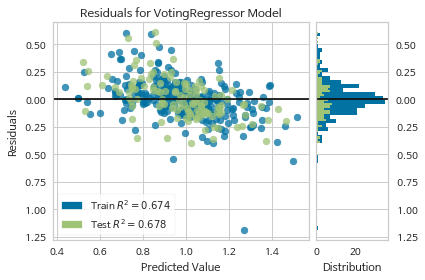

In [ ]:
plot_model(final_model_l, plot='residuals')

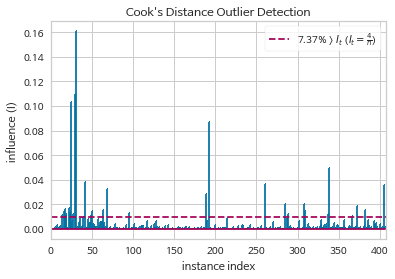

In [ ]:
plot_model(final_model_l, plot='cooks')

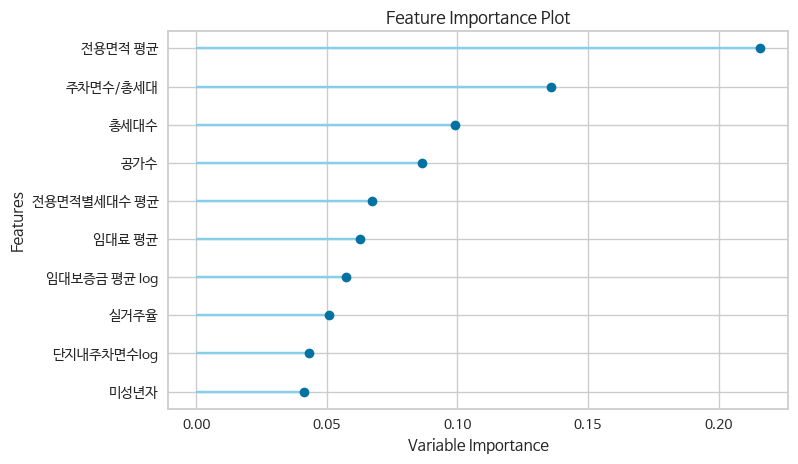

In [ ]:
rf_model = create_model('rf')
plot_model(rf_model, plot='feature')

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

pred_esb_l['예측'] = pred_esb_l['Label'] * test_agg['단지내주차면수']
pred = pred_esb_l.loc['C1072':'C2189', '예측'].values
sample_submission['num'] = pred
sample_submission.to_csv('submission.csv', index= False)   #public 102  private 98.5559